<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! This project aims to build a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* Local area income levels
* Student to teacher ratios in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

This Project's Objectives are as follows:

1. Analyse and explore the Boston house price data
2. Split data for training and testing
3. Run a Multivariable Regression
4. Evaluate how the model's coefficients and residuals
5. Transform data to improve your model performance
6. Use model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
# %pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [ ]:
housing_file = './boston.csv'
data = pd.read_csv(housing_file, index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎


In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
data.duplicated().any()

False

## Descriptive Statistics


In [ ]:
print(f'Average student to teacher ratio: {data.PTRATIO.mean():.1f}')
print(f'Average home price in: ${data.PRICE.mean()*1000:.2f}')

Average student to teacher ratio: 18.5
Average home price in: $22532.81


CHAS is a boolean indicating whether or not a house is near the Charles River.

In [ ]:
data.CHAS.describe().loc[['min', 'max']]

min   0.00
max   1.00
Name: CHAS, dtype: float64

Below are the mean, minimum and maximum values for rooms per dwelling (RM) in the dataset:

In [ ]:
data.RM.describe().loc[['mean','min','max']]

mean   6.28
min    3.56
max    8.78
Name: RM, dtype: float64

## Visualizing the Features

Having looked at some descriptive statistics, we will use Seaborn to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.

#### House Prices 💰

<Figure size 1600x800 with 0 Axes>

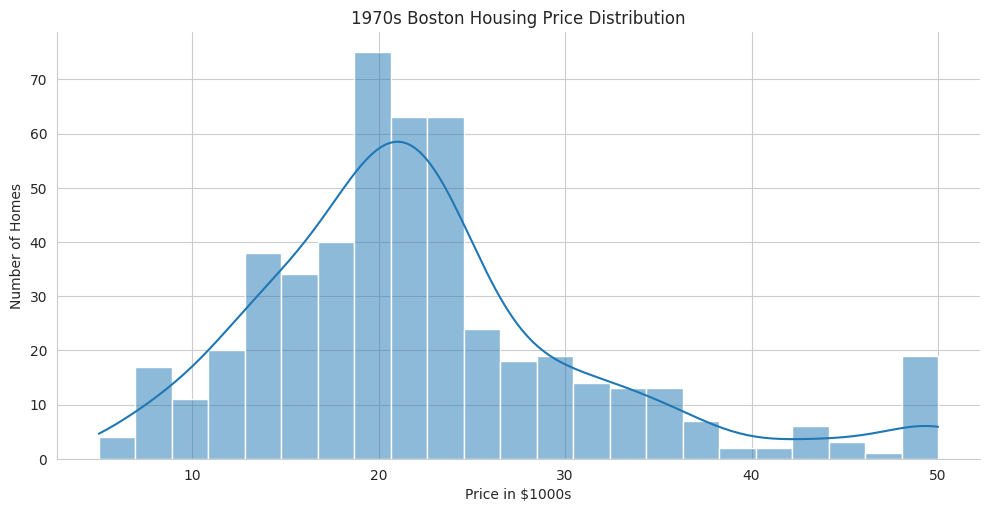

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.displot(data=data,
              x='PRICE',
              kde=True,
              aspect=2)

  plt.title('1970s Boston Housing Price Distribution')
  plt.xlabel('Price in $1000s')
  plt.ylabel('Number of Homes')

Note the spike in homes priced at the tailend of ~$50k.

#### Distance to Employment - Length of Commute 🚗

<Figure size 1600x800 with 0 Axes>

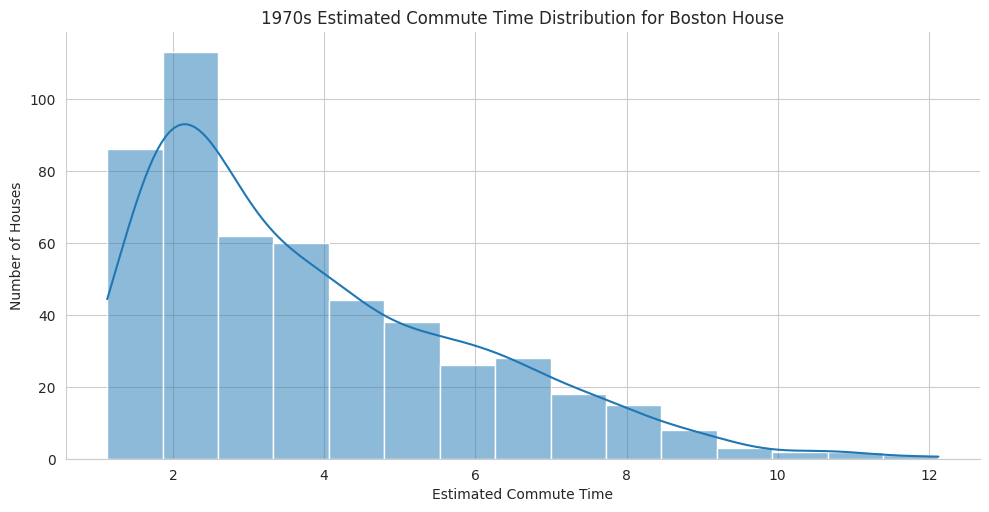

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.displot(x=data.DIS,
              kde=True,
              aspect=2,)

  plt.title('1970s Estimated Commute Time Distribution for Boston House')
  plt.xlabel('Estimated Commute Time')
  plt.ylabel('Number of Houses')

In [ ]:
print(f'The average commute time is {data.DIS.mean():.2} minutes.')

The average commute time is 3.8 minutes.


#### Number of Rooms

<Figure size 1600x800 with 0 Axes>

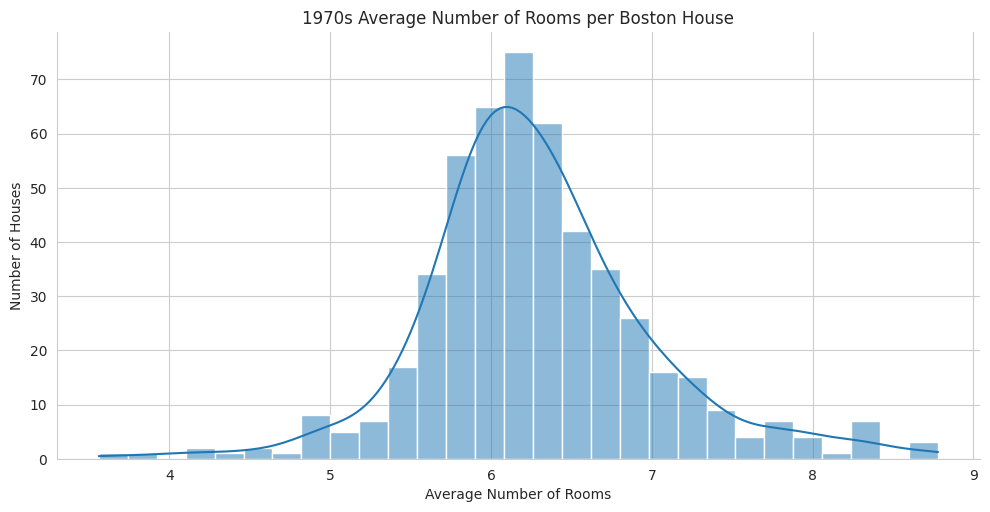

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.displot(x=data.RM,
              kde=True,
              aspect=2,)

  plt.title('1970s Average Number of Rooms per Boston House')
  plt.xlabel('Average Number of Rooms')
  plt.ylabel('Number of Houses')

The distribution is very close to normal with an average room count of:

In [ ]:
data.RM.mean()

6.284634387351779

#### Access to Highways 🛣

<Figure size 1600x800 with 0 Axes>

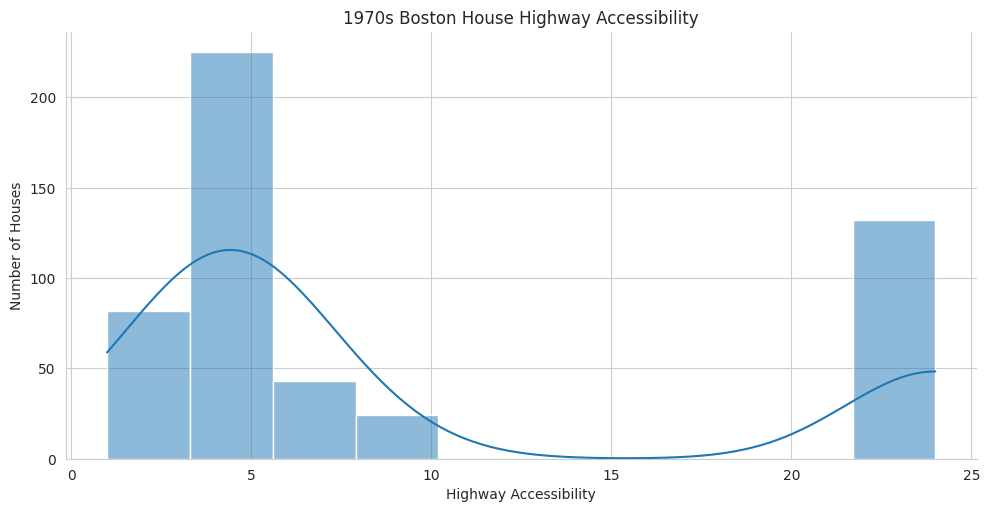

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.displot(x=data.RAD,
              kde=True,
              aspect=2,)

  plt.title('1970s Boston House Highway Accessibility')
  plt.xlabel('Highway Accessibility')
  plt.ylabel('Number of Houses')

The distribution is highly irregular with a large gap for highway accessibility.

#### Next to the River? ⛵️

Now let's use plotly to visualize CHAS, the proportion of dwellings with access to the Charles River.

In [ ]:
river_access = data.CHAS.value_counts()
river_access

0.00    471
1.00     35
Name: CHAS, dtype: int64

In [ ]:
bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title="Next to Charles River?")

bar.update_layout(xaxis_title='Propertly Located Next to River?',
                  yaxis_title='Number of Houses',
                  coloraxis_showscale=False)


bar.show()

In [ ]:
bar = px.pie(names=['No', 'Yes'],
             values=river_access.values,
             title="Next to Charles River?")

bar.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

Next, let's run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships within the dataset.

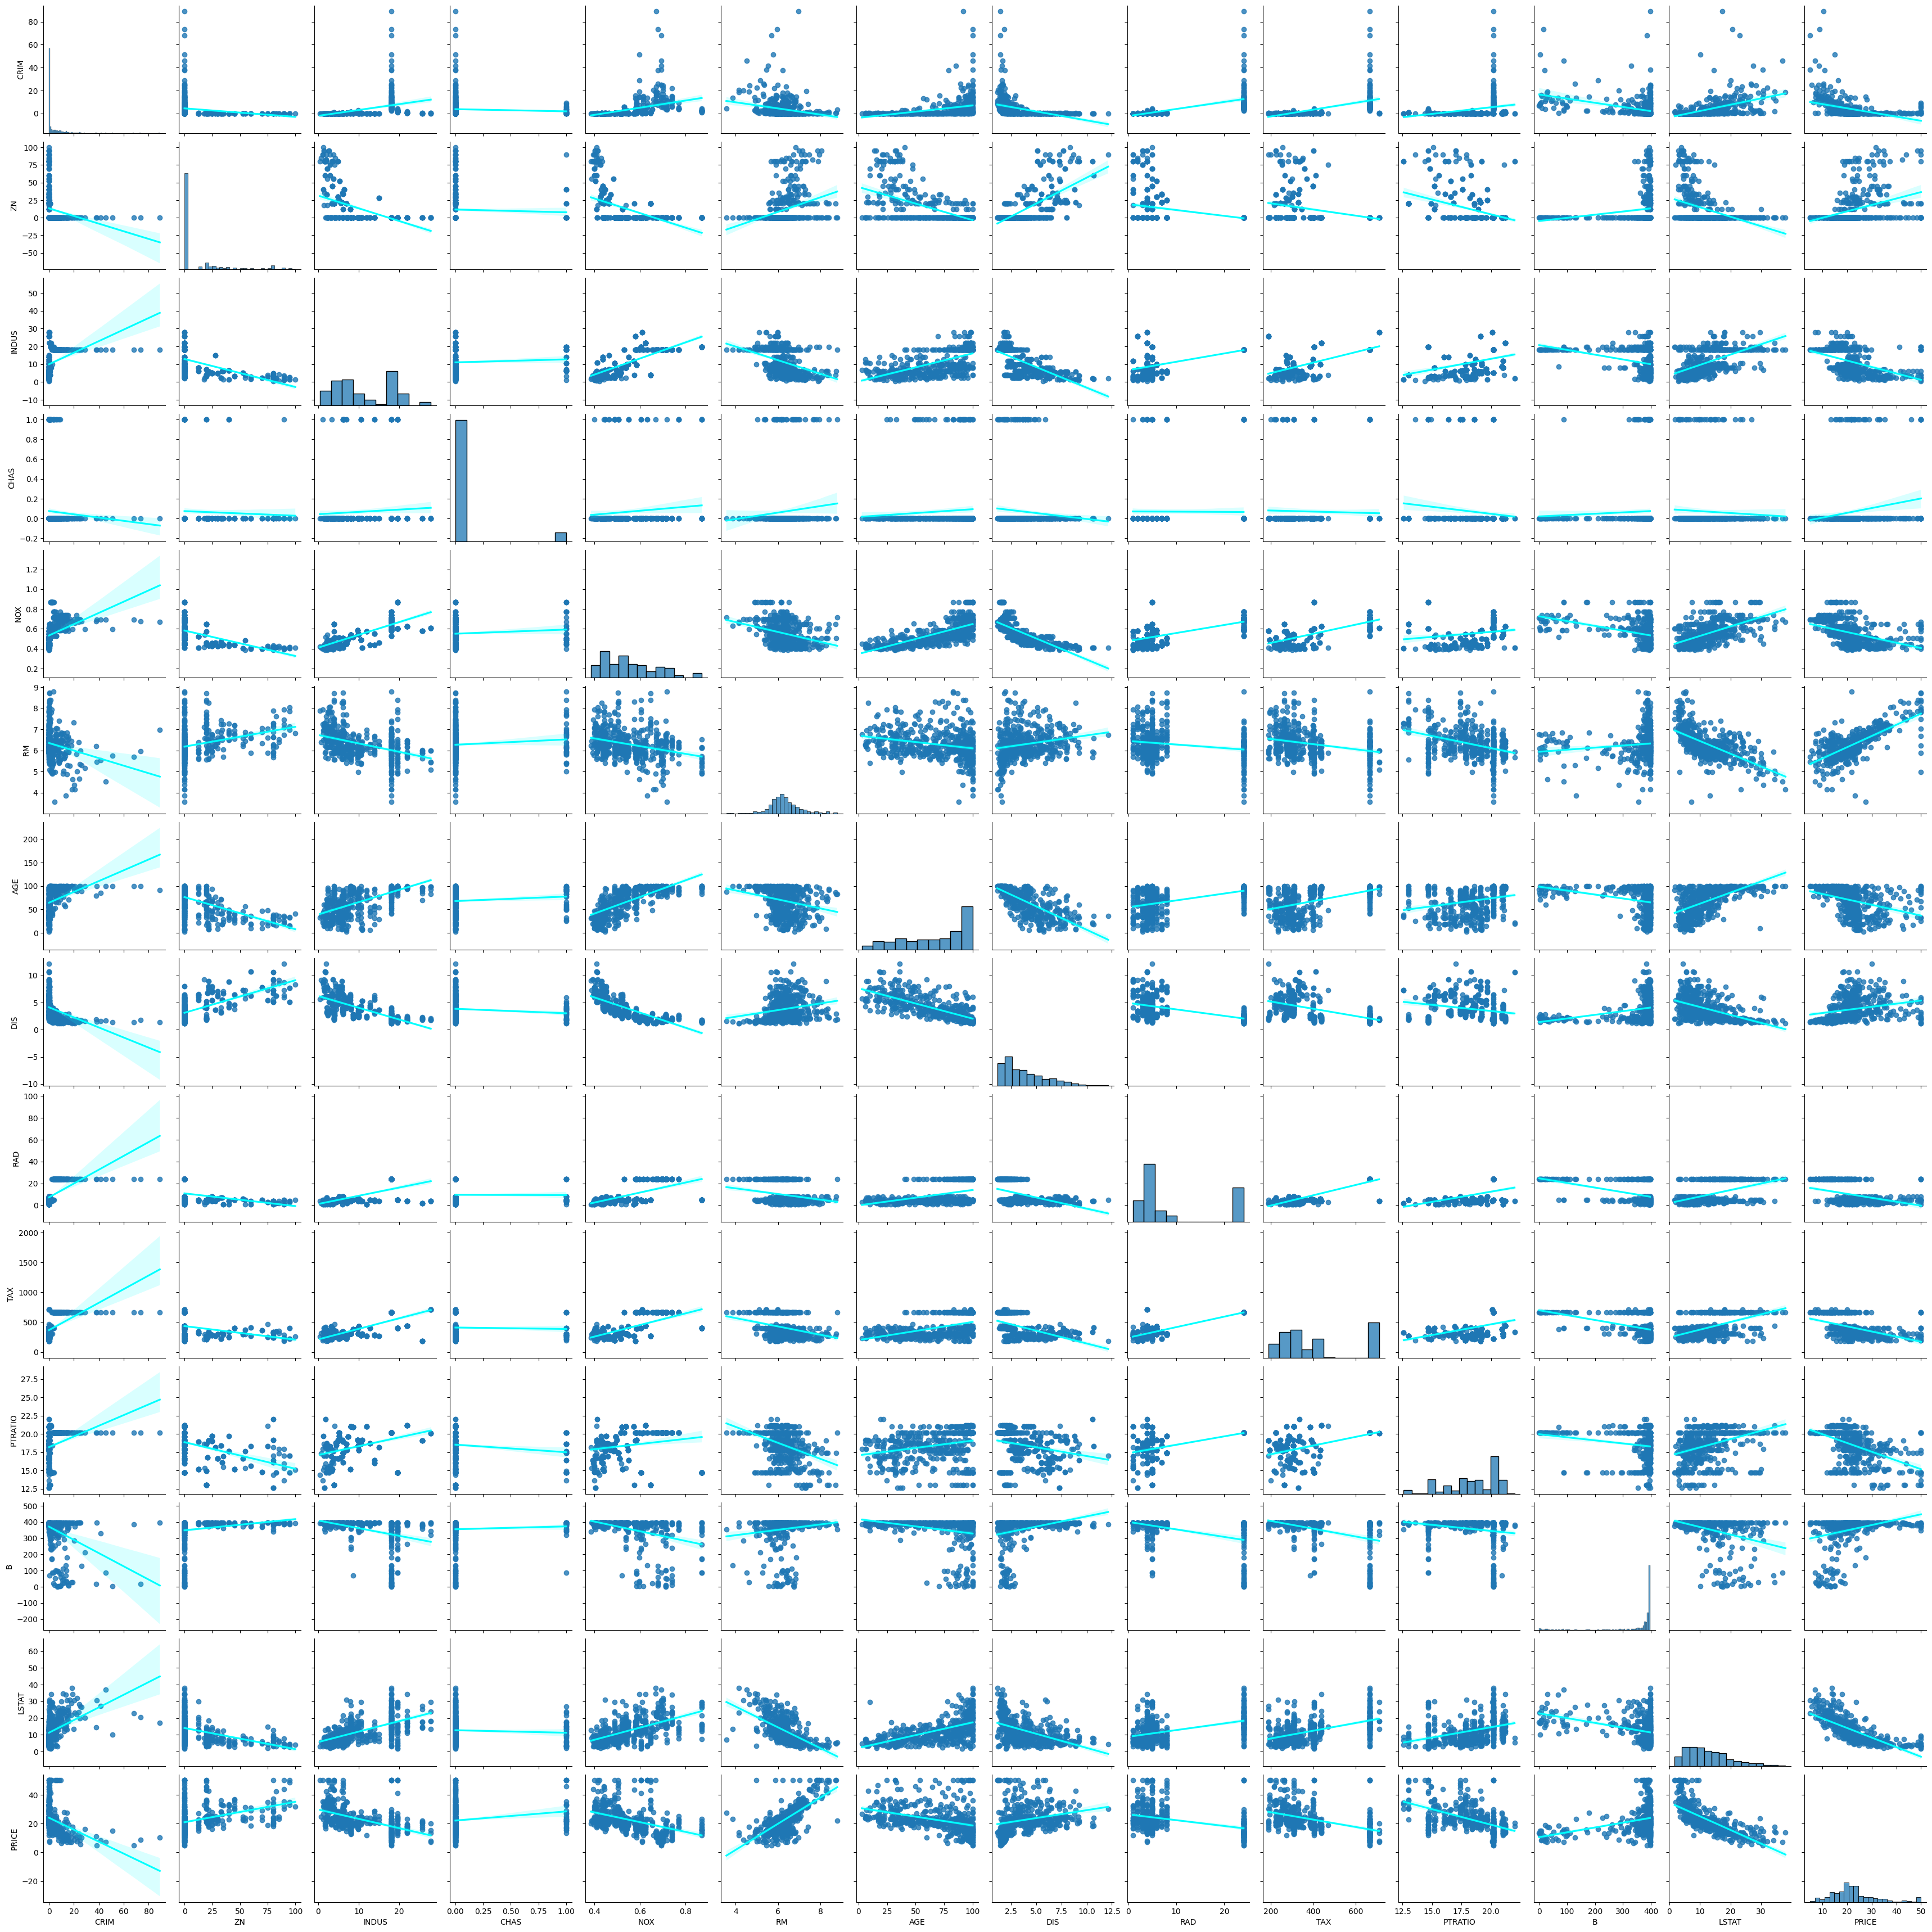

In [ ]:
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

Now lets use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Specifically:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

#### Distance from Employment vs. Pollution



According to the jointplot below, pollution has a negative correlation with distance from employment.

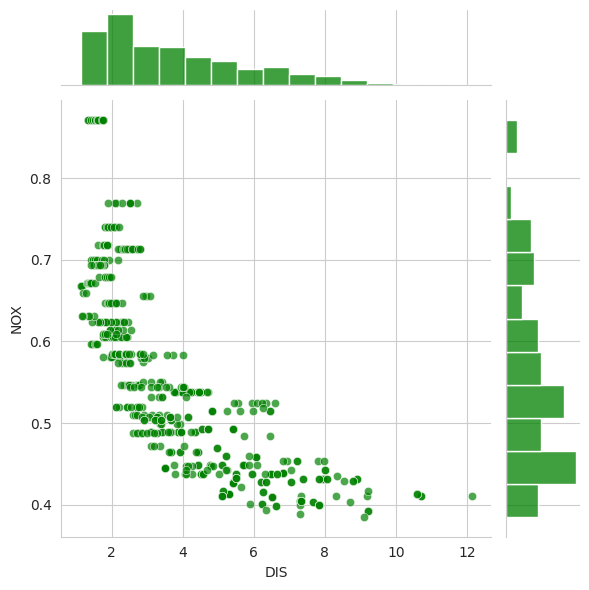

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.DIS,
                y=data.NOX,
                kind='scatter',
                color='green',
                joint_kws={'alpha': 0.7})

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution


Unsurprisingly, pollution levels have a positive correlation with more industries, but the data has more spread compared to the last jointplot.

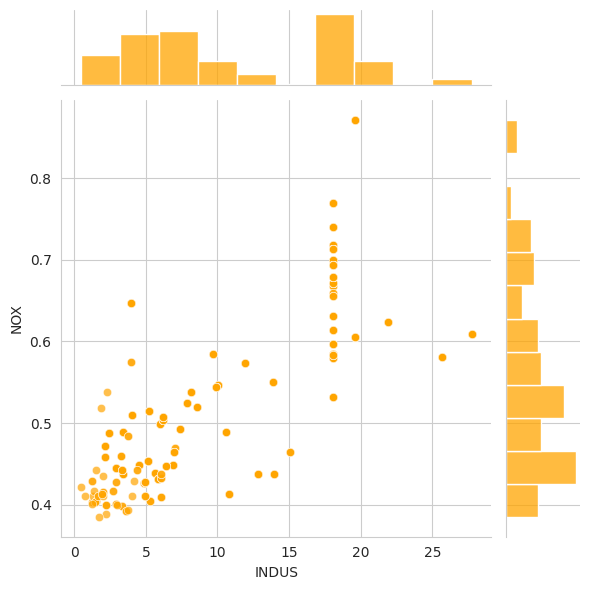

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.INDUS,
                y=data.NOX,
                kind='scatter',
                color='orange',
                joint_kws={'alpha': 0.7})

#### % of Lower Income Population vs Average Number of Rooms

The correlation between LSTAT and RM is a bit less clear than the last two jointplots, but it can be seen that lower LSTAT's have higher RM and vice versa.

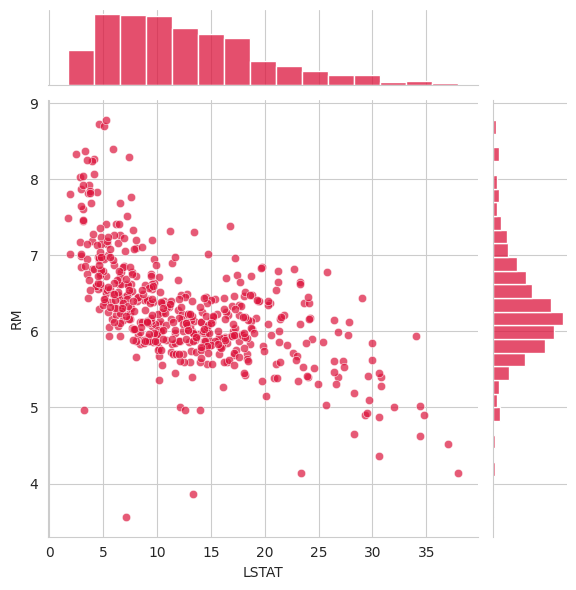

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.LSTAT,
                y=data.RM,
                kind='scatter',
                color='crimson',
                joint_kws={'alpha': 0.7})

#### % of Lower Income Population versus Home Price

According to the figure below, home prices are higher as the population of lower income in an area is smaller.

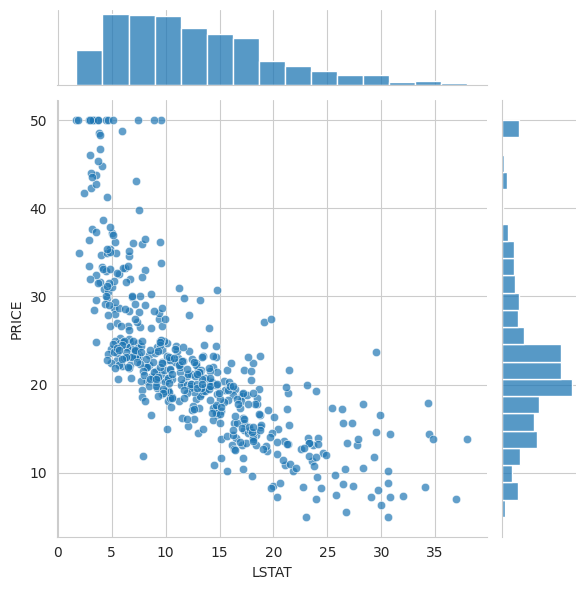

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.LSTAT,
                y=data.PRICE,
                kind='scatter',
                joint_kws={'alpha': 0.7})

#### Number of Rooms versus Home Value

Higher number of rooms have a clear positive correlation with home value. 😊

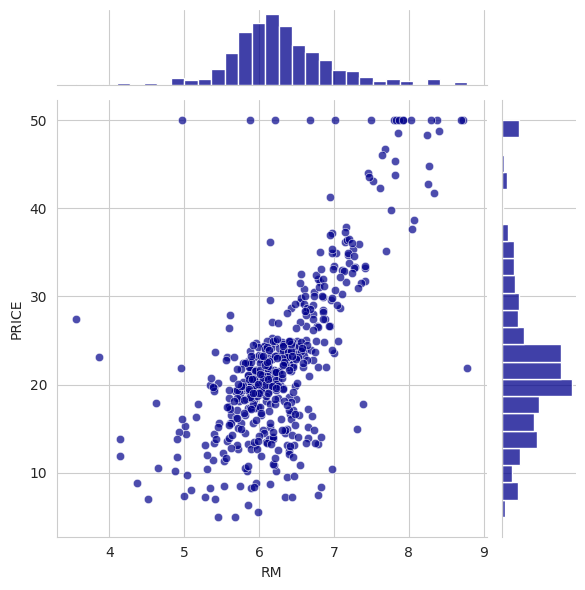

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM,
                y=data.PRICE,
                kind='scatter',
                color='darkblue',
                joint_kws={'alpha': 0.7})

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. So to do so we'll:

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20.
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning.



In [ ]:
X = data.drop('PRICE', axis=1)
y = data.PRICE
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48


# Multivariable Regression

With 13 features, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)
print(f'R-squared: {rsquared:.3f}')  # R-squared

R-squared: 0.750


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

In [ ]:
coefficients = pd.DataFrame(regression.coef_, index=X_train.columns, columns=['Coefficients'])
coefficients

,Coefficients
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


According to the coefficients, an extra room would cost about an additional $3000.

### Analyze the Estimated Values & Regression Residuals

The next step is to evaluate the regression. How good the regression is depends not only on the r-squared, it also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

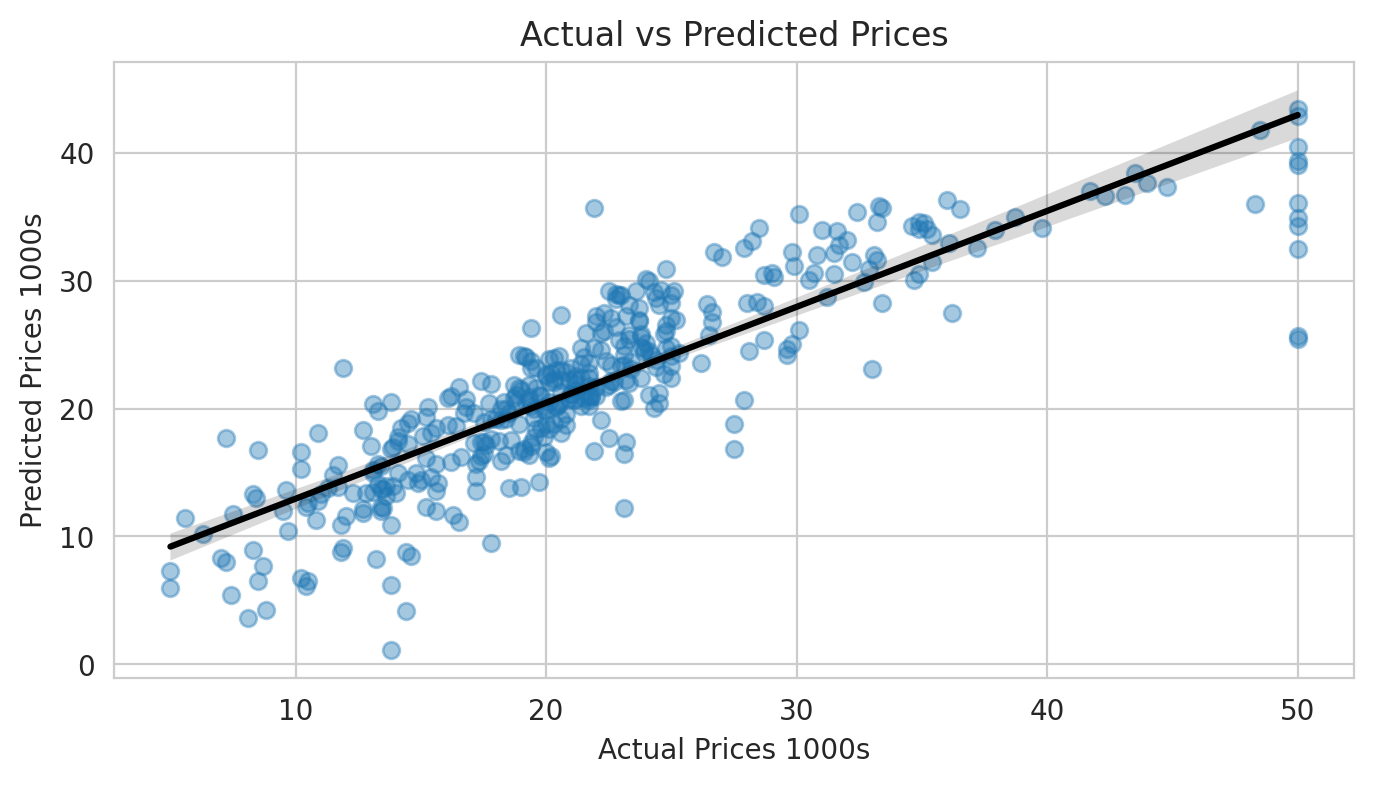

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(x=y_train,
              y=predicted_values,
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'})

  plt.xlabel('Actual Prices 1000s')
  plt.ylabel('Predicted Prices 1000s')
  plt.title('Actual vs Predicted Prices')

The figure above shows a decent fit with our predicted and the actual values from the dataset.

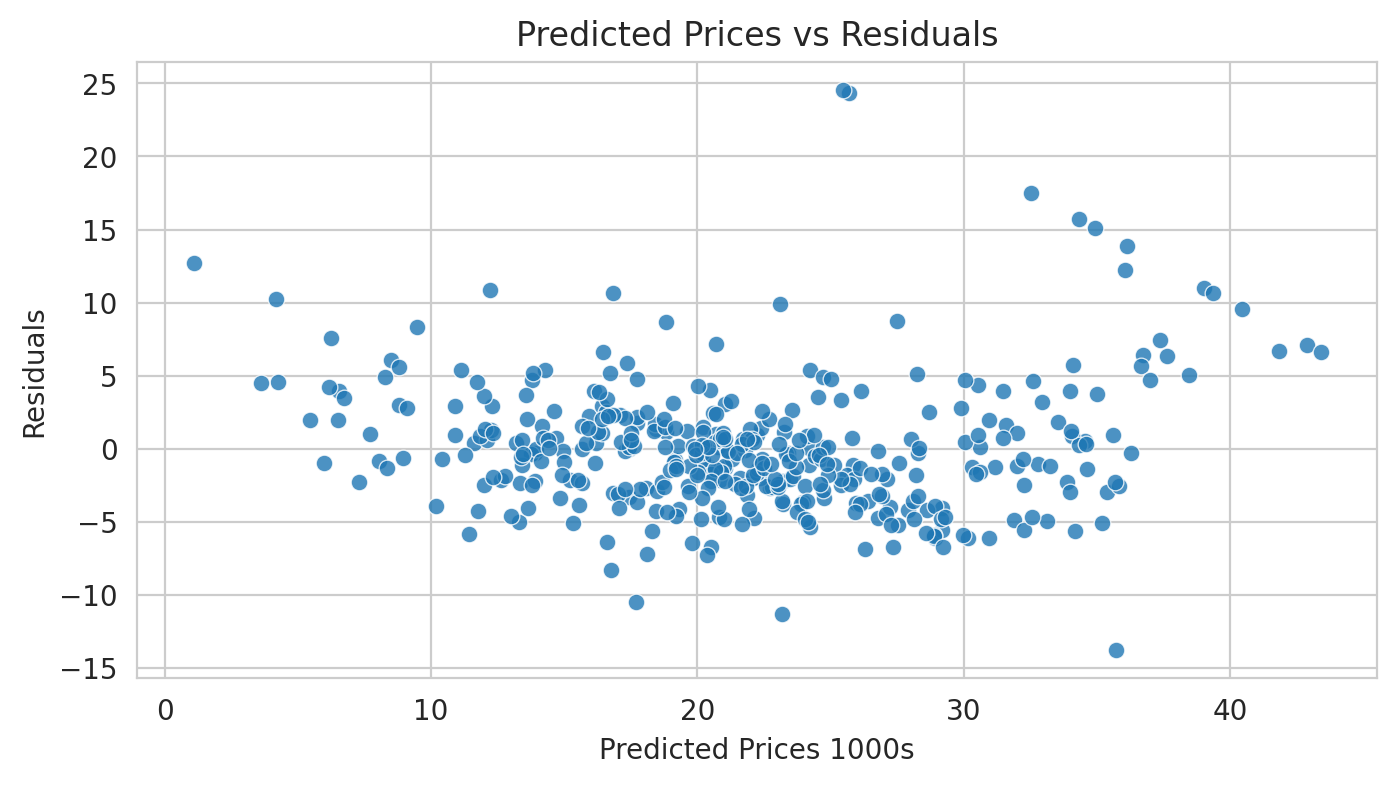

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.scatterplot(x=predicted_values,
              y=residuals,
              alpha=0.8)

  plt.xlabel('Predicted Prices 1000s')
  plt.ylabel('Residuals')
  plt.title('Predicted Prices vs Residuals')

The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>


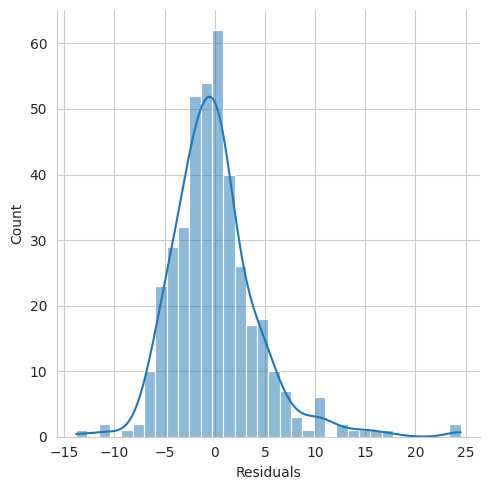

In [ ]:
# plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.displot(x=residuals,
              kde=True)

  plt.xlabel('Residuals')

In [ ]:
resid_skew = residuals.skew()
resid_mean = residuals.mean()

print(f'Residual Skew: {resid_skew:.3f}')
print(f'Residual Mean: {resid_mean:.10f}')

Residual Skew: 1.459
Residual Mean: 0.0000000000


### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.

First, let's investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation like so:

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew.
* Which distribution has a skew that's closer to zero?


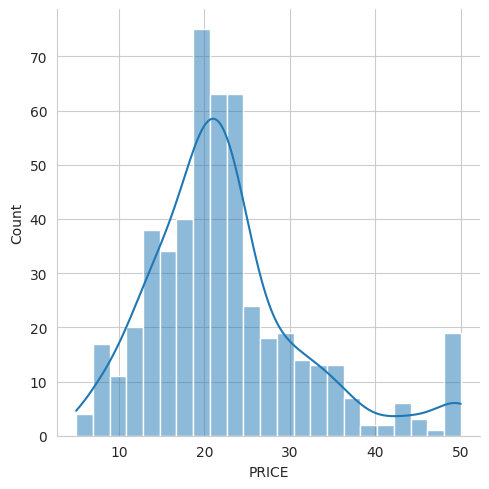

In [ ]:
with sns.axes_style('whitegrid'):
  sns.displot(x=data.PRICE,
              kde=True)

In [ ]:
print(f'PRICE Skew: {np.skew(data.PRICE, bias=False):.3f}')
print(f'PRICE Mean: {np.mean(data.PRICE):.3f}')

AttributeError: ignored

In [ ]:
log_price = np.log(data.PRICE)

In [ ]:
with sns.axes_style('whitegrid'):
  sns.displot(x=log_price, kde=True)
  plt.title(f'Log Prices. Skew is {log_price.skew():.3}')

In [ ]:
print(f'log price Skew: {skew(log_price, bias=False):.3f}')

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

In [ ]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$



In [ ]:
X_train, X_test, log_y_train, log_y_test = train_test_split(
    X, log_price, test_size=0.2, random_state=10
)

In [ ]:
log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)
print(f'R-squared for log prices: {log_rsquared:.3f}')

In [ ]:
log_predicted_values = log_regr.predict(X_train)
log_residuals = log_y_train - log_predicted_values

## Evaluating Coefficients with Log Prices

* Do the coefficients still have the expected sign?
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?

In [ ]:
log_coefs = pd.DataFrame(log_regr.coef_, index=X_test.columns, columns=['Coefficients'])
log_coefs

## Regression with Log Prices & Residual Plots


In [ ]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predicted_values, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predicted_values, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Now let's calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [ ]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}:.3f) Mean ({resid_mean}:.3f)')
plt.show()

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

Our first performance test will, be comparing the r-squared of the two models on the test dataset.

In [ ]:
print(f'Original Model Test Data r-squared: {regression.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

Now lets predict how much the average property is worth using the stats above. We will look at the log price estimate and the dollar estimate by reversing the log transformation.

In [ ]:
# Make price prediction
log_est = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_est:.3f}')

# Convert log prices to dollar values
dollar_est = np.exp(log_est) * 1000
print(f'The property is estimated to be worth ${dollar_est:.2f}')

Keeping the average values for CRIM, RAD, INDUS and others, lets value a property with the following characteristics:

In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5

In [ ]:
# Solution:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')